## ARISE-GERI data analysis

### Problem statement:



*import libraries*

In [1]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
from datetime import datetime

import math
import statistics
import scipy.stats
import chime
%load_ext chime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\USER\\Documents\\Articares\\ARISE-GERI'

In [4]:
start_codes=datetime.now()

**import assessment data**

In [5]:
xls = pd.ExcelFile('./data/Assess_IMI.xlsx')

In [6]:
xls.sheet_names

['Initial & Final Assessment',
 'Initial Assessment - Breakdown',
 'Final Assessment - Breakdown',
 'IMI-Robot Training Sessions',
 'Final Assessment only']

In [7]:
init_final = pd.read_excel(xls, 'Initial & Final Assessment', header=1)
init = pd.read_excel(xls, 'Initial Assessment - Breakdown', header=1)
final = pd.read_excel(xls, 'Final Assessment - Breakdown', header=1)
imi = pd.read_excel(xls, 'IMI-Robot Training Sessions', header=0)
final_only = pd.read_excel(xls, 'Final Assessment only', header=1)

**file path to save results**

In [8]:
results_path = os.path.join('data', 'results')
if not os.path.exists(results_path):
    os.makedirs(results_path)

### Initial & Final Assessment

In [9]:
init_final

,Participant,Mini Mental State Exam (MMSE),Montreal Cognitive Assessment (MoCA),Physical Performance Test,Mini Mental State Exam (MMSE).1,Montreal Cognitive Assessment (MoCA).1,Physical Performance Test.1,Mini Mental State Exam (MMSE).2,Montreal Cognitive Assessment (MoCA).2,Physical Performance Test.2,Unnamed: 10,Unnamed: 11
0,P01,28,29,34,28,28,28,0.0,-1.0,-6.0,NaN,NaN
1,P02,30,30,31,30,29,28,0.0,-1.0,-3.0,NaN,NaN
2,P03,30,29,34,30,30,34,0.0,1.0,0.0,NaN,NaN
3,P04,29,30,31,29,30,32,0.0,0.0,1.0,NaN,NaN
4,P05,30,29,34,0,0,0,NaN,NaN,NaN,NaN,NaN
5,P06,30,30,34,30,30,34,0.0,0.0,0.0,NaN,NaN
6,P07,30,29,28,29,22,32,-1.0,-7.0,4.0,NaN,NaN
7,P08,29,29,29,29,29,32,0.0,0.0,3.0,NaN,NaN
8,P09,29,29,32,27,25,33,-2.0,-4.0,1.0,NaN,NaN
9,P10,27,23,26,25,26,27,-2.0,3.0,1.0,NaN,NaN


In [10]:
init_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Participant                             12 non-null     object 
 1   Mini Mental State Exam (MMSE)           12 non-null     int64  
 2   Montreal Cognitive Assessment (MoCA)    12 non-null     int64  
 3   Physical Performance Test               12 non-null     int64  
 4   Mini Mental State Exam (MMSE).1         12 non-null     int64  
 5   Montreal Cognitive Assessment (MoCA).1  12 non-null     int64  
 6   Physical Performance Test.1             12 non-null     int64  
 7   Mini Mental State Exam (MMSE).2         11 non-null     float64
 8   Montreal Cognitive Assessment (MoCA).2  11 non-null     float64
 9   Physical Performance Test.2             11 non-null     float64
 10  Unnamed: 10                             0 non-null      float64


In [11]:
init_final.columns = init_final.columns.str.replace(' ', '')
init_final.columns = init_final.columns.str.lstrip()
init_final.columns = init_final.columns.str.rstrip()

In [12]:
init_final.columns

Index(['Participant', 'MiniMentalStateExam(MMSE)',
       'MontrealCognitiveAssessment(MoCA)', 'PhysicalPerformanceTest',
       'MiniMentalStateExam(MMSE).1', 'MontrealCognitiveAssessment(MoCA).1',
       'PhysicalPerformanceTest.1', 'MiniMentalStateExam(MMSE).2',
       'MontrealCognitiveAssessment(MoCA).2', 'PhysicalPerformanceTest.2',
       'Unnamed:10', 'Unnamed:11'],
      dtype='object')

In [13]:
# rename columns
init_final = init_final.rename(columns={'MiniMentalStateExam(MMSE)': 'MMSE', 
                           'MontrealCognitiveAssessment(MoCA)': 'MOCA',
                           'PhysicalPerformanceTest': 'PPT',
                           'MiniMentalStateExam(MMSE).1': 'MMSE.1', 
                           'MontrealCognitiveAssessment(MoCA).1': 'MOCA.1',
                           'PhysicalPerformanceTest.1': 'PPT.1',})

**Group 1 (errorless group)**

In [14]:
init_final_grp1 = init_final.iloc[0:6]
init_final_grp1 

,Participant,MMSE,MOCA,PPT,MMSE.1,MOCA.1,PPT.1,MiniMentalStateExam(MMSE).2,MontrealCognitiveAssessment(MoCA).2,PhysicalPerformanceTest.2,Unnamed:10,Unnamed:11
0,P01,28,29,34,28,28,28,0.0,-1.0,-6.0,NaN,NaN
1,P02,30,30,31,30,29,28,0.0,-1.0,-3.0,NaN,NaN
2,P03,30,29,34,30,30,34,0.0,1.0,0.0,NaN,NaN
3,P04,29,30,31,29,30,32,0.0,0.0,1.0,NaN,NaN
4,P05,30,29,34,0,0,0,NaN,NaN,NaN,NaN,NaN
5,P06,30,30,34,30,30,34,0.0,0.0,0.0,NaN,NaN


In [15]:
w, p = scipy.stats.wilcoxon(init_final_grp1['MMSE'], init_final_grp1['MMSE.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Mini Mental State Exam (MMSE) in group 1')
else:
    print(f'p={p:.2f}: no significant differences found in Mini Mental State Exam (MMSE) in group 1')

p=0.32: no significant differences found in Mini Mental State Exam (MMSE) in group 1


In [16]:
w, p = scipy.stats.wilcoxon(init_final_grp1['MOCA'], init_final_grp1['MOCA.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Montreal Cognitive Assessment (MoCA) in group 1')
else:
    print(f'p={p:.2f}: no significant differences found in Montreal Cognitive Assessment (MoCA) in group 1')

p=0.28: no significant differences found in Montreal Cognitive Assessment (MoCA) in group 1


In [17]:
w, p = scipy.stats.wilcoxon(init_final_grp1['PPT'], init_final_grp1['PPT.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Physical Performance Test in group 1')
else:
    print(f'p={p:.2f}: no significant differences found in Physical Performance Test in group 1')

p=0.20: no significant differences found in Physical Performance Test in group 1


**Group 2 (errorful group)**

In [18]:
init_final_grp2 = init_final.iloc[6:13]
init_final_grp2           

,Participant,MMSE,MOCA,PPT,MMSE.1,MOCA.1,PPT.1,MiniMentalStateExam(MMSE).2,MontrealCognitiveAssessment(MoCA).2,PhysicalPerformanceTest.2,Unnamed:10,Unnamed:11
6,P07,30,29,28,29,22,32,-1.0,-7.0,4.0,NaN,NaN
7,P08,29,29,29,29,29,32,0.0,0.0,3.0,NaN,NaN
8,P09,29,29,32,27,25,33,-2.0,-4.0,1.0,NaN,NaN
9,P10,27,23,26,25,26,27,-2.0,3.0,1.0,NaN,NaN
10,P11,28,24,27,29,27,33,1.0,3.0,6.0,NaN,NaN
11,P12,28,27,33,29,29,34,1.0,2.0,1.0,NaN,NaN


In [19]:
w, p = scipy.stats.wilcoxon(init_final_grp2['MMSE'], init_final_grp2['MMSE.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Mini Mental State Exam (MMSE) in group 2')
else:
    print(f'p={p:.2f}: no significant differences found in Mini Mental State Exam (MMSE) in group 2')

p=0.39: no significant differences found in Mini Mental State Exam (MMSE) in group 2


In [20]:
w, p = scipy.stats.wilcoxon(init_final_grp2['MOCA'], init_final_grp2['MOCA.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Montreal Cognitive Assessment (MoCA) in group 2')
else:
    print(f'p={p:.2f}: no significant differences found in Montreal Cognitive Assessment (MoCA) in group 2')

p=0.83: no significant differences found in Montreal Cognitive Assessment (MoCA) in group 2


In [21]:
w, p = scipy.stats.wilcoxon(init_final_grp2['PPT'], init_final_grp2['PPT.1'], zero_method = 'pratt')
if p<0.10:
    print(f'p={p:.2f}: significant differences were found in Physical Performance Test in group 2')
else:
    print(f'p={p:.2f}: no significant differences found in Physical Performance Test in group 2')

p=0.03: significant differences were found in Physical Performance Test in group 2


### IMI-Robot Training Sessions

In [22]:
imi.head()

,Participant,No.,Intrinsic Motivation Inventory\nSession 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,P01,NaN,NaN,1\nStrongly Disagree,2.0,3.0,4.0,5.0,6.0,7\nStrongly Agree,...,7\nStrongly Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,I enjoyed doing this activity very much,NaN,NaN,NaN,NaN,NaN,NaN,7,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,I felt very tense while doing this activity,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,I would describe this activity as very interes...,NaN,NaN,NaN,NaN,NaN,NaN,7,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,This activity did not hold my attention at all,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*segregate worksheet*

In [23]:
# report last row of Q13
nr_13 = imi.loc[imi['No.']==13].index.values
nr_13

array([ 13,  28,  43,  58,  73,  88, 103, 118, 133, 148, 163, 178],
      dtype=int64)

**based on patient**

In [24]:
# split row-wise according to patient nr.
list_of_imi = []
start=0
for nr in range(0,12):
#     name = 'P' + str(nr+1).zfill(2)
    name = imi.iloc[start:nr_13[nr]+1]
    list_of_imi.append(name)
    start = nr_13[nr]+2
    

In [25]:
# split column-wise according to sessions per patient nr.
list_of_df = []
for nr, df in enumerate(list_of_imi):
    df2 = list_of_imi[nr].iloc[:, :10].T.apply(sorted, key=pd.isna).T.iloc[1: , 0:3].reset_index().drop(columns=['index']) 
    df3 = list_of_imi[nr].iloc[:, 11:19].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df4 = list_of_imi[nr].iloc[:, 20:28].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df5 = list_of_imi[nr].iloc[:, 29:37].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df6 = list_of_imi[nr].iloc[:, 38:46].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df7 = list_of_imi[nr].iloc[:, 47:55].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df8 = list_of_imi[nr].iloc[:, 56:64].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    df9 = list_of_imi[nr].iloc[:, 65:73].T.apply(sorted, key=pd.isna).T.iloc[1: , 1:2].reset_index().drop(columns=['index'])
    
    df2[3] = df3
    df2[4] = df4
    df2[5] = df5
    df2[6] = df6
    df2[7] = df7
    df2[8] = df8
    df2[9] = df9

    df2.rename(columns={'Participant': 'No.', 'No.': 'statement','Intrinsic Motivation Inventory\nSession 2': '2'},inplace=True)
#     df2.iloc[:, 2:10] = df2.iloc[:, 2:10].astype('Int64')
    df2.iloc[:, 2:10] = df2.iloc[:, 2:10].astype('float')
    list_of_df.append(df2)

In [26]:
list_of_df[11].iloc[:, 2:10]

,2,3,4,5,6,7,8,9
0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,5.0,5.0,4.0,4.0,1.0,4.0,4.0,5.0
2,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
3,7.0,1.0,7.0,1.0,7.0,7.0,7.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0
6,1.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0
7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
8,5.0,6.0,4.0,7.0,7.0,4.0,4.0,3.0
9,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


P09 session4, Q2 has 2 answers. Codes took score as (2), left-wise squeeze. 

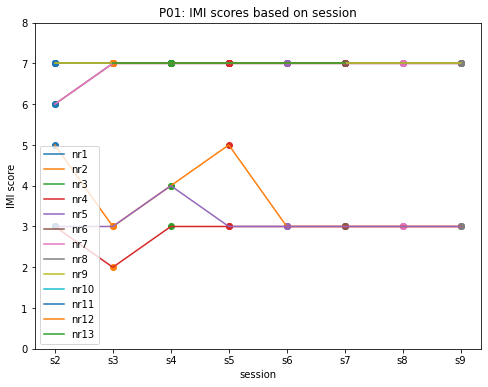

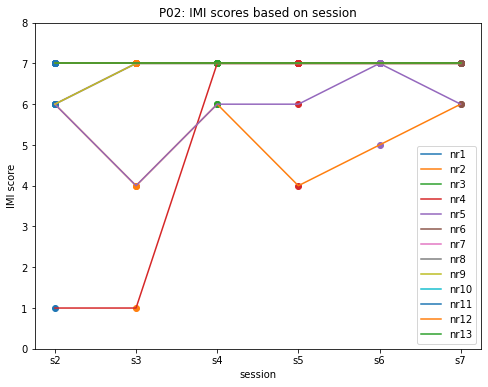

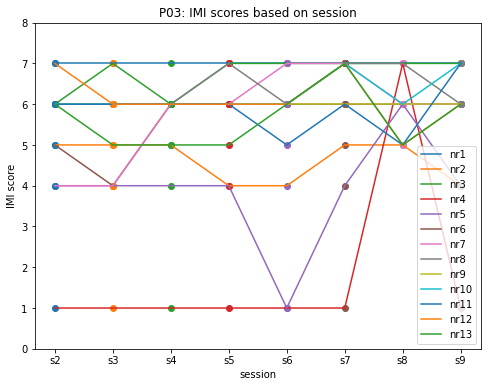

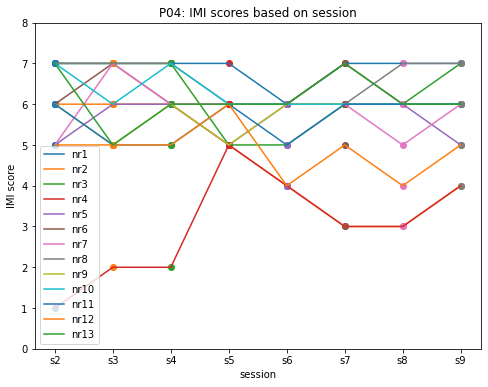

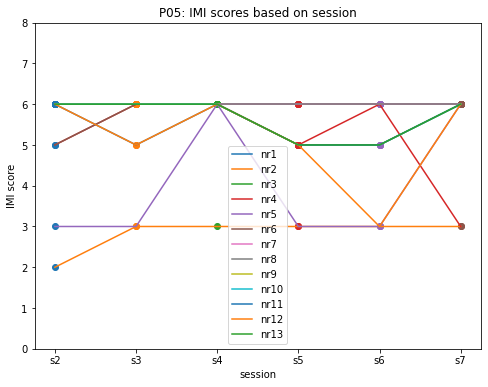

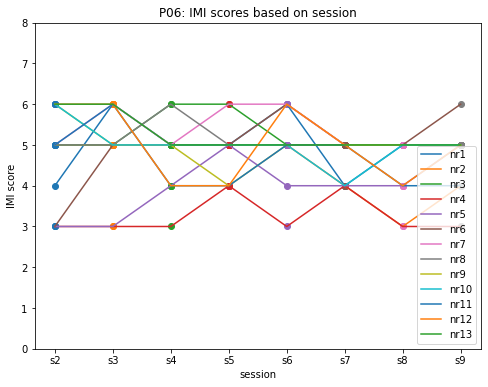

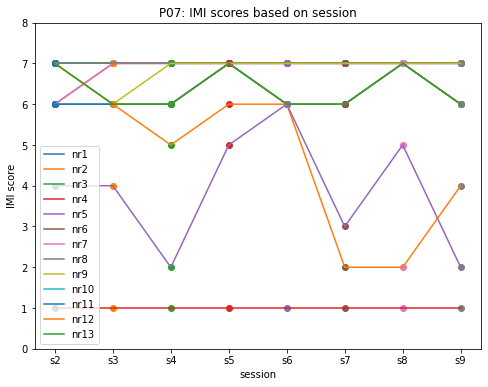

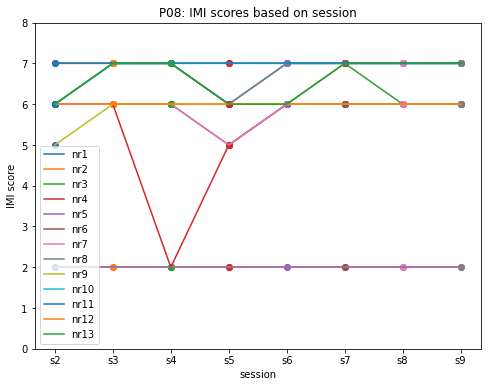

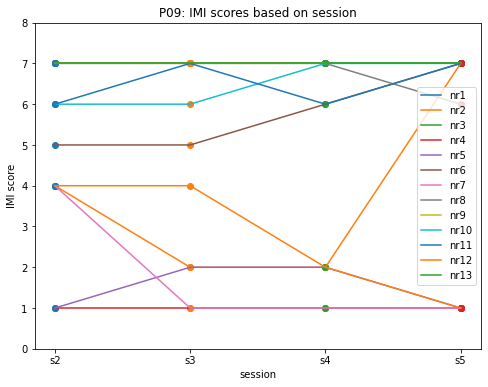

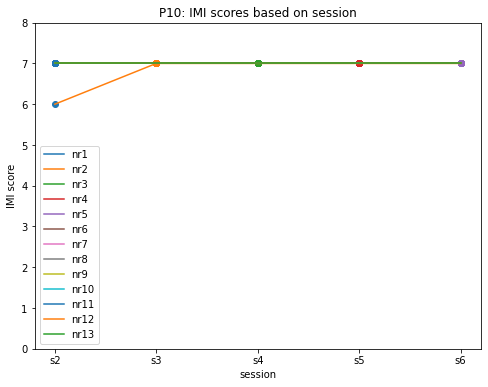

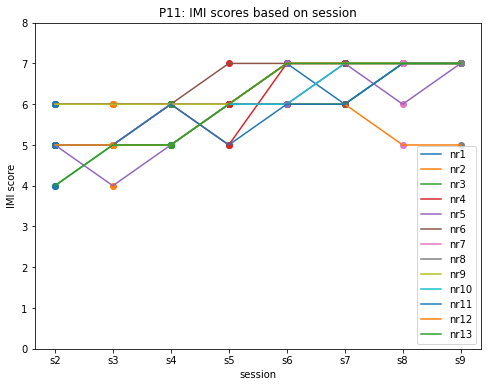

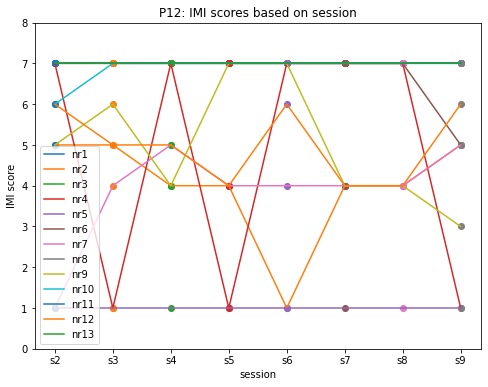

In [27]:
for nr, df in enumerate(list_of_df):
#     df = df.fillna(0)
    PatientID = str(nr+1).zfill(2)
    plt.figure(figsize=(8, 6))
    x = ['s2','s3','s4','s5','s6','s7','s8','s9']
    y = [df.iloc[:,2], df.iloc[:,3], df.iloc[:,4], df.iloc[:,5], df.iloc[:,6], df.iloc[:,7], df.iloc[:,8], df.iloc[:,9]]
    # plot timesession
    for xe, ye in zip(x, y):
        plt.scatter([xe] * len(ye), ye)

    lineObjects = plt.plot(x, y)
    plt.legend(iter(lineObjects), ('nr1','nr2', 'nr3', 'nr4', 'nr5', 'nr6','nr7','nr8','nr9','nr10','nr11','nr12','nr13'))
    plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.ylim([0,8])
    plt.title(f'P{PatientID}: IMI scores based on session')
    plt.xlabel('session')
    plt.ylabel('IMI score')
    plt.show;  

base measure. performance 
physical performance test, cognitive test
given challenging test, (errorful group) would motivation drop? 


In [28]:
list_of_df[4].iloc[:, 2:10] 

,2,3,4,5,6,7,8,9
0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN
1,2.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN
3,5.0,6.0,6.0,5.0,6.0,3.0,NaN,NaN
4,3.0,3.0,6.0,3.0,3.0,6.0,NaN,NaN
5,5.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN
6,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN
7,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN
8,6.0,6.0,6.0,5.0,5.0,6.0,NaN,NaN
9,6.0,6.0,6.0,5.0,5.0,6.0,NaN,NaN


**based on sessions, split into 2 groups**

**Group 1 (errorless group)**

In [29]:
# P01-P06
# group 1
grp1_s2 = []
grp1_s3 = []
grp1_s4 = []
grp1_s5 = []
grp1_s6 = []
grp1_s7 = []
grp1_s8 = []
grp1_s9 = []

for nr in range(0,6):
    grp1_s2.append(list_of_df[nr].iloc[:, 2])
    grp1_s3.append(list_of_df[nr].iloc[:, 3])
    grp1_s4.append(list_of_df[nr].iloc[:, 4])
    grp1_s5.append(list_of_df[nr].iloc[:, 5])
    grp1_s6.append(list_of_df[nr].iloc[:, 6])
    grp1_s7.append(list_of_df[nr].iloc[:, 7])
    grp1_s8.append(list_of_df[nr].iloc[:, 8])
    grp1_s9.append(list_of_df[nr].iloc[:, 9])

# convert to df
grp1_df = pd.DataFrame(pd.DataFrame.from_records(grp1_s2).T.mean(skipna=True, axis=1),columns=['s2_mean'])
grp1_df['s3_mean'] = pd.DataFrame.from_records(grp1_s3).T.mean(skipna=True, axis=1)
grp1_df['s4_mean'] = pd.DataFrame.from_records(grp1_s4).T.mean(skipna=True, axis=1)
grp1_df['s5_mean'] = pd.DataFrame.from_records(grp1_s5).T.mean(skipna=True, axis=1)
grp1_df['s6_mean'] = pd.DataFrame.from_records(grp1_s6).T.mean(skipna=True, axis=1)
grp1_df['s7_mean'] = pd.DataFrame.from_records(grp1_s7).T.mean(skipna=True, axis=1)
grp1_df['s8_mean'] = pd.DataFrame.from_records(grp1_s8).T.mean(skipna=True, axis=1)
grp1_df['s9_mean'] = pd.DataFrame.from_records(grp1_s9).T.mean(skipna=True, axis=1)
grp1_df

,s2_mean,s3_mean,s4_mean,s5_mean,s6_mean,s7_mean,s8_mean,s9_mean
0,6.166667,6.666667,6.500000,6.500000,6.500000,6.333333,6.500000,6.50
1,4.833333,4.333333,4.833333,4.333333,4.000000,4.000000,3.500000,3.75
2,6.333333,6.500000,6.500000,6.333333,6.166667,6.333333,6.250000,6.50
3,2.333333,2.500000,3.666667,4.166667,4.000000,3.500000,4.000000,2.75
4,4.000000,3.833333,5.000000,4.333333,4.000000,4.833333,4.750000,4.25
5,5.333333,6.000000,6.166667,6.166667,6.333333,6.333333,6.000000,6.25
6,5.333333,6.166667,6.166667,6.333333,6.500000,6.333333,5.750000,6.00
7,6.333333,6.333333,6.500000,6.333333,6.166667,6.333333,6.500000,6.25
8,6.166667,6.000000,6.166667,5.666667,6.000000,6.166667,6.000000,6.00
9,6.400000,6.166667,6.333333,6.000000,6.000000,6.166667,5.666667,6.25


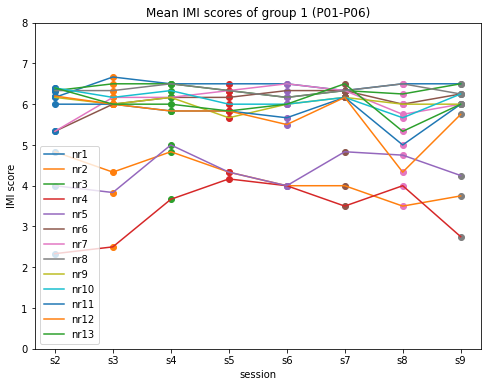

In [30]:
plt.figure(figsize=(8, 6))
x = ['s2','s3','s4','s5','s6','s7','s8','s9']
y = [grp1_df.iloc[:,0], grp1_df.iloc[:,1], grp1_df.iloc[:,2], grp1_df.iloc[:,3], grp1_df.iloc[:,4], grp1_df.iloc[:,5], grp1_df.iloc[:,6], grp1_df.iloc[:,7]]
# plot timesession
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

lineObjects = plt.plot(x, y)
plt.legend(iter(lineObjects), ('nr1','nr2', 'nr3', 'nr4', 'nr5', 'nr6','nr7','nr8','nr9','nr10','nr11','nr12','nr13'))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim([0,8])
plt.title('Mean IMI scores of group 1 (P01-P06)')
plt.xlabel('session')
plt.ylabel('IMI score')
plt.show;  

In [31]:
stats, p = scipy.stats.kruskal(grp1_df.iloc[:,1], grp1_df.iloc[:,2], grp1_df.iloc[:,3], grp1_df.iloc[:,4], grp1_df.iloc[:,5], grp1_df.iloc[:,6], grp1_df.iloc[:,7])
stats, p 

(3.7553952819189753, 0.7097375413180748)

**Group 2 (errorful group)**

In [32]:
# P07-P12
# group 2
grp2_s2 = []
grp2_s3 = []
grp2_s4 = []
grp2_s5 = []
grp2_s6 = []
grp2_s7 = []
grp2_s8 = []
grp2_s9 = []

for nr in range(6,12):
#     print(nr)
    grp2_s2.append(list_of_df[nr].iloc[:, 2])
    grp2_s3.append(list_of_df[nr].iloc[:, 3])
    grp2_s4.append(list_of_df[nr].iloc[:, 4])
    grp2_s5.append(list_of_df[nr].iloc[:, 5])
    grp2_s6.append(list_of_df[nr].iloc[:, 6])
    grp2_s7.append(list_of_df[nr].iloc[:, 7])
    grp2_s8.append(list_of_df[nr].iloc[:, 8])
    grp2_s9.append(list_of_df[nr].iloc[:, 9])
    
# convert to df
grp2_df = pd.DataFrame(pd.DataFrame.from_records(grp2_s2).T.mean(skipna=True, axis=1),columns=['s2_mean'])
grp2_df['s3_mean'] = pd.DataFrame.from_records(grp2_s3).T.mean(skipna=True, axis=1)
grp2_df['s4_mean'] = pd.DataFrame.from_records(grp2_s4).T.mean(skipna=True, axis=1)
grp2_df['s5_mean'] = pd.DataFrame.from_records(grp2_s5).T.mean(skipna=True, axis=1)
grp2_df['s6_mean'] = pd.DataFrame.from_records(grp2_s6).T.mean(skipna=True, axis=1)
grp2_df['s7_mean'] = pd.DataFrame.from_records(grp2_s7).T.mean(skipna=True, axis=1)
grp2_df['s8_mean'] = pd.DataFrame.from_records(grp2_s8).T.mean(skipna=True, axis=1)
grp2_df['s9_mean'] = pd.DataFrame.from_records(grp2_s9).T.mean(skipna=True, axis=1)
grp2_df 

,s2_mean,s3_mean,s4_mean,s5_mean,s6_mean,s7_mean,s8_mean,s9_mean
0,6.666667,6.833333,6.833333,6.666667,7.0,6.75,7.00,7.00
1,4.666667,4.500000,4.333333,5.333333,4.4,3.50,3.25,4.00
2,6.333333,6.666667,6.666667,6.666667,6.6,6.75,6.75,6.75
3,4.666667,3.666667,4.000000,3.333333,5.6,5.25,5.25,3.75
4,3.333333,3.333333,3.166667,3.666667,4.4,3.25,3.50,3.00
5,6.000000,6.166667,6.500000,6.666667,6.8,6.75,6.75,6.25
6,4.833333,5.000000,5.333333,5.000000,6.2,6.00,6.00,6.25
7,6.833333,6.833333,6.833333,6.500000,7.0,7.00,7.00,7.00
8,6.166667,6.333333,6.166667,6.666667,6.8,6.00,6.00,5.75
9,6.000000,6.333333,6.500000,6.833333,6.6,6.75,7.00,6.75


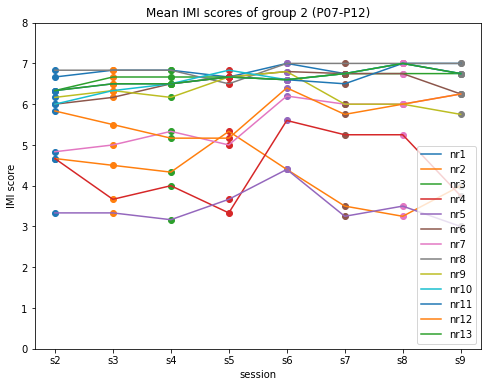

In [33]:
plt.figure(figsize=(8, 6))
x = ['s2','s3','s4','s5','s6','s7','s8','s9']
y = [grp2_df.iloc[:,0], grp2_df.iloc[:,1], grp2_df.iloc[:,2], grp2_df.iloc[:,3], grp2_df.iloc[:,4], grp2_df.iloc[:,5], grp2_df.iloc[:,6], grp2_df.iloc[:,7]]
# plot timesession
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

lineObjects = plt.plot(x, y)
plt.legend(iter(lineObjects), ('nr1','nr2', 'nr3', 'nr4', 'nr5', 'nr6','nr7','nr8','nr9','nr10','nr11','nr12','nr13'))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim([0,8])
plt.title('Mean IMI scores of group 2 (P07-P12)')
plt.xlabel('session')
plt.ylabel('IMI score')
plt.show;  

In [34]:
stats, p = scipy.stats.kruskal(grp2_df.iloc[:,0], grp2_df.iloc[:,1], grp2_df.iloc[:,2], grp2_df.iloc[:,3], grp2_df.iloc[:,4], grp2_df.iloc[:,5], grp2_df.iloc[:,6], grp2_df.iloc[:,7])
stats, p 

(5.506047528299369, 0.5984545244971649)

In [35]:
%chime print(f'total run time = {datetime.now()-start_codes}')

total run time = 0:00:07.737740
